In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from utils import get_spike_activity, sdf, sdf_mean, sdf_change
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

In [4]:
with open("/home/nomodel/code/NODS/network_configuration.json", "r") as json_file:
    net_config = json.load(json_file)

CS_burst_dur = net_config["devices"]["CS"]["parameters"]["burst_dur"]
CS_start_first = float(net_config["devices"]["CS"]["parameters"]["start_first"])
between_start = net_config["devices"]["CS"]["parameters"]["between_start"]
n_trials = net_config["devices"]["CS"]["parameters"]["n_trials"]
US_start_first = float(net_config["devices"]["US"]["parameters"]["start_first"])
cell_color = net_config["cell_types"]["granule_cell"]["color"][0]
CS_color = net_config["colors"]["CS"]
US_color = net_config["colors"]["US"]
with_NO_color = net_config["devices"]["nNOS"]["color"][0]
without_NO_color = "#000000"
cell = "granule_spikes"

In [5]:
results_path = f"/home/nomodel/code/NODS/results/grid_search/grid_complete_1/min4_plus8/4/"
spk = get_spike_activity(cell_name=cell, path=results_path)
evs_cell = spk[:, 0]
sdf_mean_cell = []
sdf_change_alltrials = []

results_path_NO = f"/home/nomodel/code/NODS/results/grid_search/grid_NO/min4_plus8/1/"
spk_NO = get_spike_activity(cell_name=cell, path=results_path_NO)
evs_cell_NO = spk[:, 0]
sdf_mean_cell_NO = []
sdf_change_alltrials_NO = []

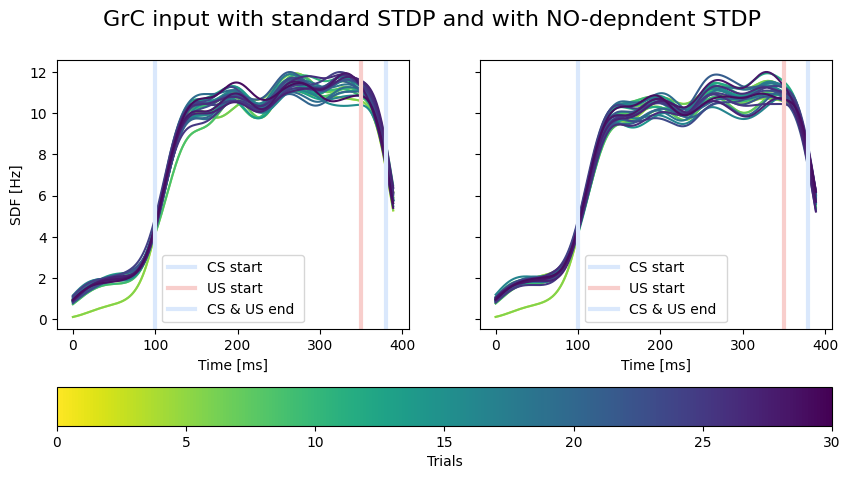

In [7]:
palette = list(reversed(sns.color_palette("viridis", n_trials).as_hex()))
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=plt.Normalize(vmin=0, vmax=n_trials))

fig_sdf, axs_sdf = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

step = 5
for trial in range(n_trials):
    start = trial * between_start
    stop = CS_start_first + CS_burst_dur + trial * between_start
    sdf_cell = sdf(start=start, stop=stop, spk=spk, step=step)
    sdf_mean_cell.append(sdf_mean(sdf_cell))
    sdf_cell_NO = sdf(start=start, stop=stop, spk=spk_NO, step=step)
    sdf_mean_cell_NO.append(sdf_mean(sdf_cell_NO))

    axs_sdf[0].plot(sdf_mean_cell[trial], palette[trial])
    axs_sdf[1].plot(sdf_mean_cell_NO[trial], palette[trial])

axs_sdf[0].axvline(CS_start_first, label="CS start", linewidth=3, c=CS_color)
axs_sdf[0].axvline(
    US_start_first - between_start, label="US start", linewidth=3, c=US_color
)
axs_sdf[0].axvline(
    CS_start_first + CS_burst_dur, label="CS & US end ", linewidth=3, c=CS_color
)
axs_sdf[1].axvline(CS_start_first, label="CS start", linewidth=3, c=CS_color)
axs_sdf[1].axvline(
    US_start_first - between_start, label="US start", linewidth=3, c=US_color
)
axs_sdf[1].axvline(
    CS_start_first + CS_burst_dur, label="CS & US end ", linewidth=3, c=CS_color
)

axs_sdf[0].set_ylabel("SDF [Hz]")
axs_sdf[0].set_xlabel("Time [ms]")
axs_sdf[1].set_xlabel("Time [ms]")
axs_sdf[0].legend()
axs_sdf[1].legend()
cbar = plt.colorbar(sm, ax=axs_sdf.ravel().tolist(), orientation='horizontal')
cbar.set_label('Trials')

fig_sdf.suptitle(
    "GrC input with standard STDP and with NO-depndent STDP", fontsize=16
)

plt.show()
fig_sdf.savefig("grc_sdf.svg")
fig_sdf.savefig("grc_sdf.png")